# **Cross Validation**
- Cross validation is a method used to estimate the performance (or accuracy) of machine learning models.
- It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.
- In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.

###  **Why We Use Cross-Validation**
- **Model Evaluation:** It provides a more accurate estimate of a model's performance on unseen data compared to a single train-test split.

- **Bias-Variance Trade-off:** By using different training and test sets, cross-validation helps in balancing bias and variance, providing a better understanding of the model's generalizability.

- **Hyperparameter Tuning:** Cross-validation is often used in conjunction with grid search or random search to find the best hyperparameters for a model.

- **Detecting Overfitting:** It helps in identifying whether the model is overfitting the training data, as overfitting models tend to perform poorly on the test sets in cross-validation.

- **Robustness:** It makes the model evaluation robust by averaging the performance metrics over multiple folds, reducing the impact of any one particular train-test split.


There are various types of cross validation we will explore all of them one by one. But first let's train our RandomForest on the iris dataset.

In [6]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load the dataset
data = load_iris()
X, y = data.data, data.target


## **Types of Cross Validation**
### **1. Holdout Validation**
- In Holdout Validation, we perform training on the 50% of the given dataset and rest 50% is used for the testing purpose.
- The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e. higher bias.

In [7]:
# Hold out validation using 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


### **2. K-Fold Cross-Validation**
In K-Fold Cross-Validation, the dataset is divided into K equally sized folds. The model is trained K times, each time using K-1 folds for training and the remaining fold for testing.

- It is widely used because it provides a good balance between bias and variance in the evaluation.
 
- It gives an average performance metric (e.g., accuracy, RMSE) across all folds, providing a more robust estimate of the model's performance on unseen data.

In [8]:
from sklearn.model_selection import KFold, cross_val_score

# Create the model
model = RandomForestClassifier()

# Set up K-Fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Evaluate the model
scores = cross_val_score(model, X, y, cv = kf)
print(f"Cross-Validation Scores: ",scores)
print(f"Mean Accuracy: {scores.mean()}")


Cross-Validation Scores:  [1.         0.97368421 0.91891892 0.97297297]
Mean Accuracy: 0.966394025604552


### **3. Stratified K-Fold Cross-Validation**
Stratified K-Fold Cross-Validation is similar to K-Fold but ensures that each fold has a similar distribution of target classes. This is especially useful for imbalanced datasets.

- Useful when dealing with imbalanced datasets to ensure that each fold is representative of the overall class distribution.

- It helps to avoid bias in evaluation metrics due to imbalanced data, providing a more accurate estimate of the model's performance across different classes.

In [9]:
from sklearn.model_selection import StratifiedKFold

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits = 4, shuffle=True, random_state=42)

# Evaluate the model
scores = cross_val_score(model, X, y, cv = skf)
print(f"Stratified Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


Stratified Cross-Validation Scores: [1.         0.92105263 0.97297297 0.91891892]
Mean Accuracy: 0.9532361308677099


### **4. Leave-One-Out Cross-Validation (LOOCV)**
LOOCV is a special case of K-Fold where K is equal to the number of observations in the dataset. Each observation is used once as a test set, and the model is trained on the rest.

- Ideal for small datasets as it maximizes the training data available in each iteration.
- It provides an exhaustive evaluation of the model but can be computationally expensive and sensitive to outliers.

In [10]:
from sklearn.model_selection import LeaveOneOut

# Set up Leave-One-Out cross-validation
loo = LeaveOneOut()

# Evaluate the model
scores = cross_val_score(model, X, y, cv=loo)
print(f"LOOCV Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


LOOCV Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 0.9533333333333334


---
# **Overfitting**

Overfitting is a problem in machine learning where the models learns the data patterns too well that it also includes the outliers nad noise. So when we want to test our model on unseen data our model performs poorly.

In overfitting model becomes too much aware of the training data that when unseen data appears it performs poorly.

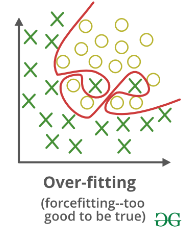

## **Causes of overfitting**
The overfitting can be caused by multiple reasons:

#### **1. Complex Models:** 
If we use a very complex model for a very simple task then it will learn all the underlying patterns and our model will become overfit.

#### **2. Insufficient data:** 
If there's not enough data, the model might find patterns that don't really exist.

#### **3. Noisy data:** 
If the training data contains errors or random fluctuations, an overfitted model will treat these as patterns.

## **How to detect overfitting**
We can detest overfittnig by using:

1. Validation Set
If model is performing well on training data but performs poorly on validation set then model is overfit.

2. Learning Curves
Plot the model performance for both validation nad training ober the epochs and see the results.

3. Cross-validation
Use cross-validation, where the training data is split multiple times and the model is evaluated on each split.

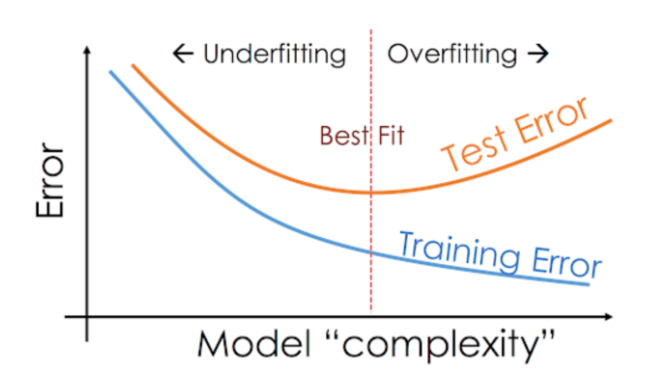

## **How to prevent Overfitting:**
We can prevent overfitting by using:

**1. Simpler Models**

Use simpler model, add complexity only if needed.

**2. More data**

The more data on which model is trained the better it generaliza

**3. Regularization**

Techniques like L1 and L2 regularization can help prevent overfitting by penalizing certain model parameters if they're likely causing overfitting.

**4. Dropout**

In neural networks, dropout is a technique where random neurons are "dropped out" during training, forcing the network to learn more robust features.



---
# **Underfitting**
A statistical model or a machine learning algorithm is said to have underfitting when a model is too simple to capture data complexities.

- It represents the inability of the model to learn the training data effectively result in poor performance both on the training and testing data.

-  It mainly happens when we uses very simple model with overly simplified assumptions.

- To address underfitting problem of the model, we need to use more complex models, with enhanced feature representation, and less regularization.

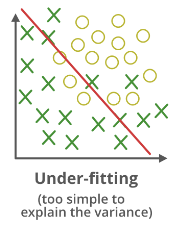

## **Causes of Underfitting**
- The model is too simple, So it may be not capable to represent the complexities in the data.
- The input features which is used to train the model is not the adequate representations of underlying factors influencing the target variable.
- The size of the training dataset used is not enough.
- Excessive regularization are used to prevent the overfitting, which constraint the model to capture the data well.
- Features are not scaled.

### **How to prevent Underfitting**
1. Increase model complexity.
2. Increase the number of features, performing feature engineering.
3. Remove noise from the data.
3. Increase the number of epochs or increase the duration of training to get better results.

## **Code Demonstration**
Now let's try to understand overfitting and underfitting with the help of an example.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



In [57]:
# Define a function to plot data
def true_fun(X):
    return np.sin(1.2 * np.pi * X)

In [60]:
np.random.seed(0)

n_samples = 40
degrees = [1, 4, 20]
# Define features nad targets
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


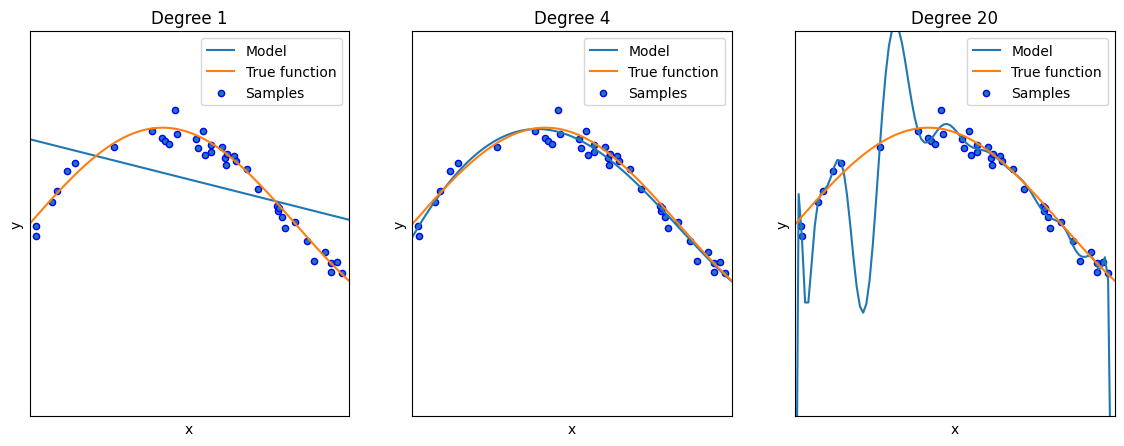

In [61]:

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. 

The plot shows the function that we want to approximate, which is a part of the cosine function. 

In addition, the samples from the real function and the approximations of different models are displayed. 

- **Plot A:** The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. 

- **Plot B:** A polynomial of degree 4 approximates the true function almost perfectly. 
- **Plot C:** However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation.

Now let's consider an example to see how model complexity effect the model to become underfit or overfit.
First lets create some data usig sklearn datasets

In [65]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(2000, random_state=0, noise=0.22)
X = StandardScaler().fit_transform(X) # Useful for polynomial features
xvar, yvar, label = 'height', 'ear_length', 'survived'
df = pd.DataFrame({xvar: X[:, 0], yvar: X[:, 1], label: y})

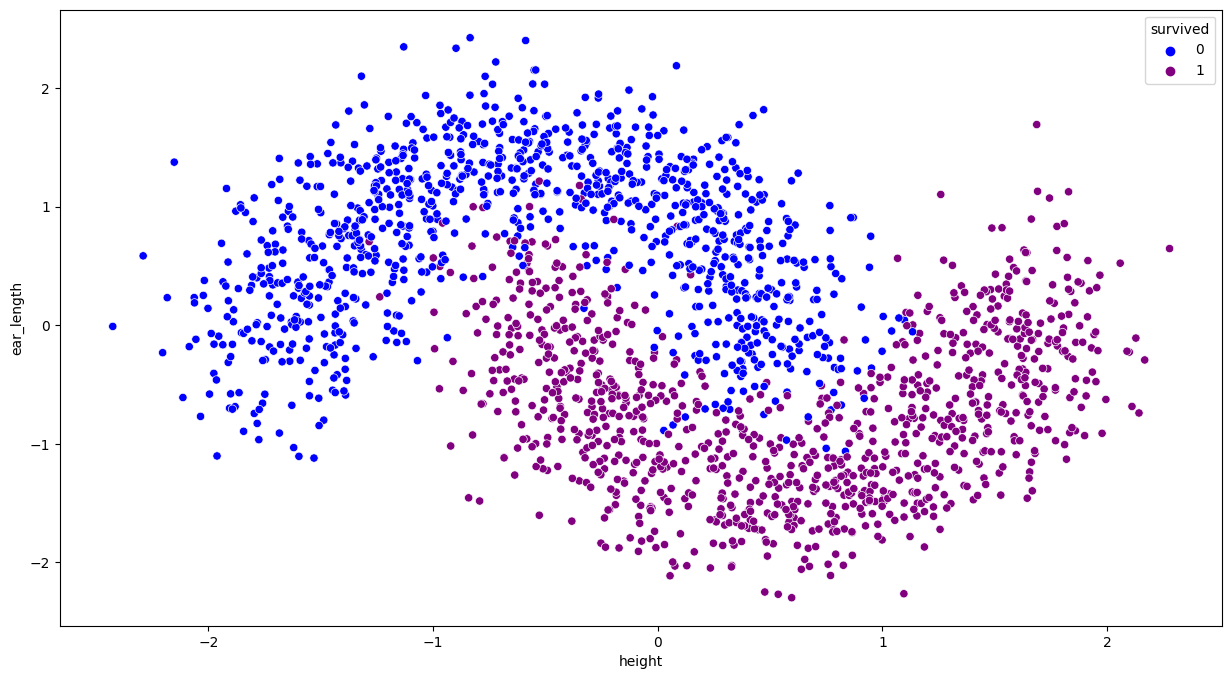

In [66]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x=xvar, y=yvar, hue=label, palette={0.0: 'blue', 1.0: 'purple'});

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[[xvar, yvar]], df[label], random_state=0)

Now we will apply Logistic Regression on our model and see the results.

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Train accuracy: ', model.score(X_train, y_train))
print('Test  accuracy: ', model.score(X_test, y_test))

Train accuracy:  0.8686666666666667
Test  accuracy:  0.854


We create a function o display the decisionn boundary of our model to see the model is overfit, underfit or a good fit.

In [72]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, df):
    xmin, xmax = -2.50, 2.0
    ymin, ymax = -2.0, 2.0
    xstep = 0.01
    ystep = 0.01
    
    xx, yy = np.meshgrid(np.arange(xmin, xmax+xstep, xstep), np.arange(ymin, ymax+ystep, ystep))
    meshdf = pd.DataFrame({xvar: xx.ravel(), yvar: yy.ravel()})
    Z = model.predict(meshdf).reshape(xx.shape)

    plt.figure(figsize=(16, 8))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap([(1.0, 0.7, 0.7), (0.7, 1.0, 0.7)]))
    sns.scatterplot(data=df, x=xvar, y=yvar, hue=label, palette={0.0: 'blue', 1.0: 'purple'});

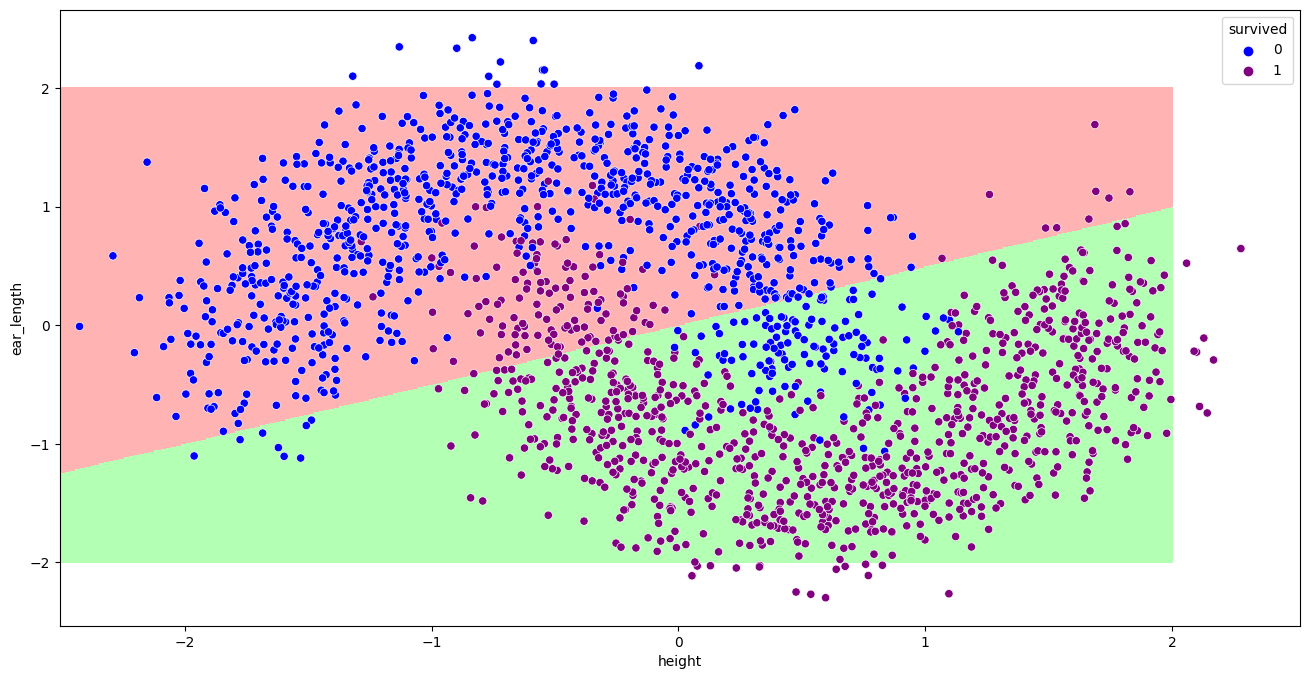

In [73]:
plot_decision_boundary(model, df)


As our model was to simple it will underfit our data, as we can see it was unable to classify the data accurately.

Now if we increase the complexity of our model and see the results.

We will use a more complex model that is the random forest to see what happens.

Train accuracy:  1.0
Test  accuracy:  0.942


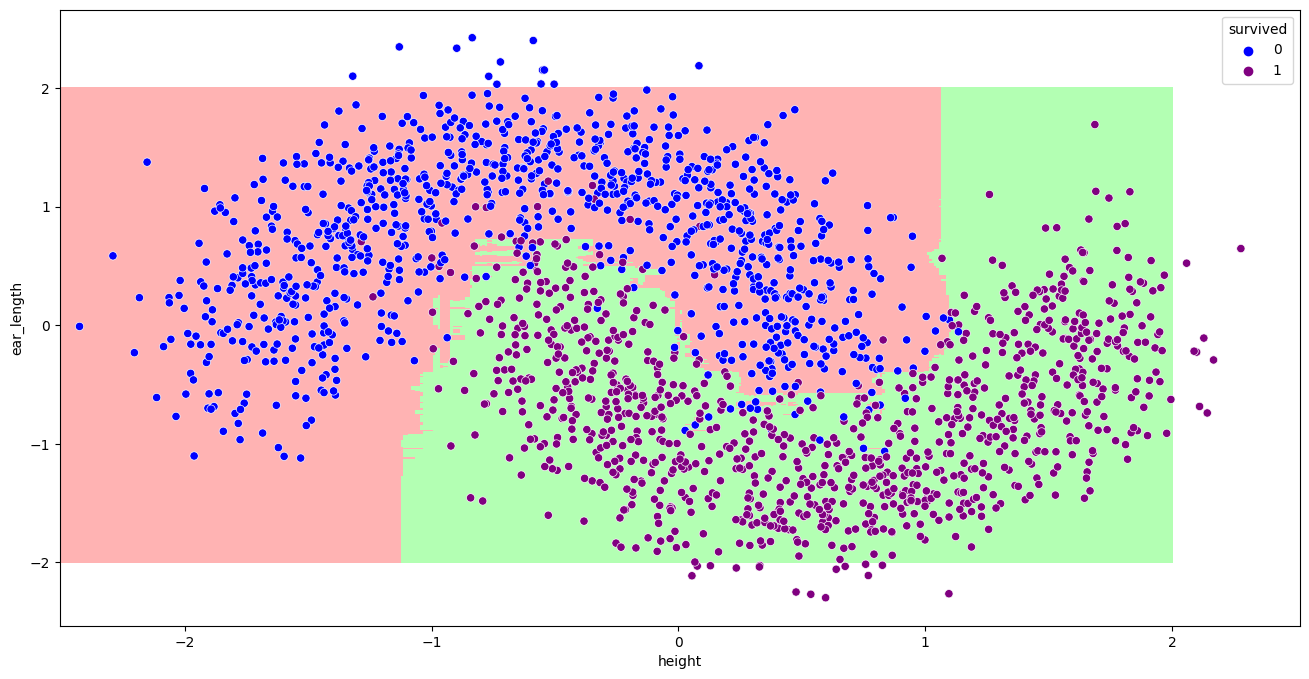

In [92]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Train accuracy: ', model.score(X_train, y_train))
print('Test  accuracy: ', model.score(X_test, y_test))
plot_decision_boundary(model, df)

As we can see increasing our model complexity results in overfitting, so now we will decrease the degree of polynomial features and see the reulsts.

Train accuracy:  0.9673333333333334
Test  accuracy:  0.954


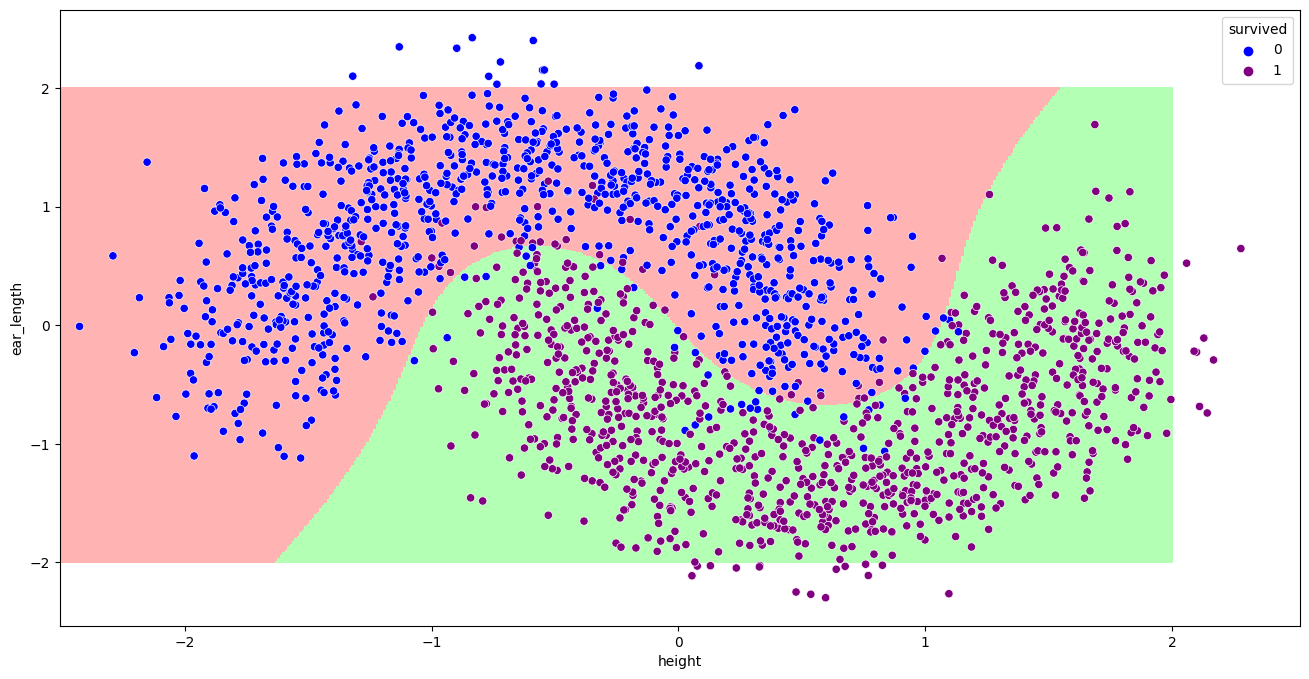

In [77]:
model = Pipeline([
    ('poly', PolynomialFeatures(3, include_bias=False)),
    ('model', LogisticRegression(max_iter=100000))
])
model.fit(X_train, y_train)
print('Train accuracy: ', model.score(X_train, y_train))
print('Test  accuracy: ', model.score(X_test, y_test))
plot_decision_boundary(model, df)

The above model is a good fit as it correctly learns the data's underlying features while preventing it from overfitting.